In [103]:
#######################

In [1]:


nuwro = True
ISRUN3 = False


#True for normal, false for stat err
#useWeights = True


In [2]:
import sys

#sys.path.insert(0, 'backend_functions')

#import selection_functions as sf

import importlib

import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb

import awkward
import matplotlib.pyplot as plt
import pandas as pd

import ROOT
from ROOT import TH1F, TH2F, TDirectory, TH1D

#import top 
#from top import *

#importlib.reload(sf)
#from selection_functions import *

Welcome to JupyROOT 6.24/02


In [3]:


fold = "nuselection"
tree = "NeutrinoSelectionFilter"



In [4]:
if nuwro: 
    path = "/media/alex/TOSHIBA EXT/"

In [5]:


if nuwro: 
    overlay = uproot.open(path+"neutrinoselection_filt_run1_overlay_nuwro.root")[fold][tree]
    nue = uproot.open(path+"neutrinoselection_filt_run1_overlay_nuwro_intrinsic.root")[fold][tree]

uproot_v = [overlay,nue]

In [6]:


variables = [
    "selected", "nu_pdg", 
    "trk_score_v", "_opfilter_pe_beam", "_opfilter_pe_veto",
    "shr_tkfit_dedx_Y", "trk_theta", "trk_phi",
    "ccnc", "shr_px", "shr_py", "shr_pz",
    "n_tracks_contained", 
    "NeutrinoEnergy2", "shr_theta", "shr_phi",
    "reco_nu_vtx_sce_x","reco_nu_vtx_sce_y","reco_nu_vtx_sce_z",
    "true_nu_vtx_x", "true_nu_vtx_y" , "true_nu_vtx_z", 
    "nproton", "nu_e", "n_showers_contained",
    "shr_score", "topological_score",
    "trk_energy", "tksh_distance", "tksh_angle",
    "npi0", "trk_mcs_muon_mom_v", "trk_range_muon_mom_v",
    "shr_energy_tot_cali", "shr_energy_cali", 
    "nslice", "true_nu_vtx_sce_x", "true_nu_vtx_sce_y", "true_nu_vtx_sce_z",
    "contained_fraction", "trk_energy_tot",
    "npion", "trk_sce_end_z_v", "trk_sce_end_y_v", "trk_sce_end_x_v",
    "shrmoliereavg", "muon_e", "proton_e", "trk_energy_muon",
    "shrsubclusters0","shrsubclusters1","shrsubclusters2", 
    "shr_tkfit_npointsvalid","shr_tkfit_npoints", "true_e_visible", "trkshrhitdist2", 
    "weightSplineTimesTune", "weightTune", "true_nu_px", "true_nu_py", "true_nu_pz", 
    "elec_e", "proton_e", "mc_px", "mc_py", "mc_pz", "elec_px", "elec_py", "elec_pz", 
    "swtrig_pre", "ppfx_cv", "mc_pdg",  'interaction', 'run', "opening_angle", "mc_E"]


variables = list(set(variables))
print(variables)


['NeutrinoEnergy2', 'true_nu_vtx_x', 'mc_pdg', 'trk_energy_muon', 'muon_e', 'mc_py', 'tksh_distance', 'opening_angle', 'trk_energy', 'topological_score', 'run', 'nproton', 'n_showers_contained', 'true_e_visible', 'trk_sce_end_x_v', 'n_tracks_contained', 'shrsubclusters0', 'ccnc', 'elec_pz', 'nu_e', 'mc_pz', 'true_nu_vtx_sce_y', 'proton_e', 'ppfx_cv', 'shr_energy_cali', 'shr_pz', 'shr_score', 'trk_range_muon_mom_v', 'true_nu_vtx_sce_x', 'shr_phi', 'reco_nu_vtx_sce_y', 'true_nu_vtx_z', 'shrmoliereavg', 'swtrig_pre', 'trkshrhitdist2', 'shr_px', 'reco_nu_vtx_sce_z', 'shr_energy_tot_cali', 'trk_energy_tot', 'elec_e', 'shr_py', 'trk_sce_end_z_v', 'selected', 'trk_score_v', 'trk_mcs_muon_mom_v', 'shrsubclusters2', 'true_nu_vtx_y', 'shr_tkfit_dedx_Y', 'trk_phi', 'npi0', 'nslice', 'trk_theta', 'true_nu_vtx_sce_z', 'contained_fraction', 'npion', 'shr_tkfit_npointsvalid', 'shr_tkfit_npoints', 'mc_px', 'tksh_angle', 'weightSplineTimesTune', 'elec_py', '_opfilter_pe_veto', 'trk_sce_end_y_v', 'true_

In [7]:
import load_data_run123

#overlay = overlay.pandas.df(variables, flatten=False)
import time
s = time.time()

#df_v = [overlay]
uproot_v = [overlay]
var_v = [variables]

for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        overlay = CVDF

s2 = time.time()
print("runtime = ", s2-s)

trk_llr_pid_v  [[] [] [0.96992034 -0.031569537] ... [0.96793294 0.40650022] [] []]
trk_score_v  [[] [] [0.9998714 0.50025755] ... [1.0 0.35099977] [] []]


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in power
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/awkward/array/jagged.py:1043: RuntimeWarning: overflow encountered in true_divide
  result = getattr(ufunc, method)(*inputs, **kwargs)


updated proton mask test
runtime =  87.29399108886719


In [8]:


#nue = nue.pandas.df(variables, flatten=False)

import time
s = time.time()

#df_v = [overlay]
uproot_v = [nue]
var_v = [variables]

for ii, CV in enumerate(uproot_v):
    CVDF  = CV.pandas.df(var_v[ii], flatten=False)
    load_data_run123.process_uproot_numu(CV,CVDF)
    if ii == 0:
        nue = CVDF

s2 = time.time()
print("runtime = ", s2-s)

trk_llr_pid_v  [[-0.78143746 0.38416666] [0.87407523] [0.95106965 0.9559888 0.9254303 0.15696444] ... [] [0.9717339] [0.964979 0.9468219 0.45449623 ... 0.40842512 0.27252463 -0.024122704]]
trk_score_v  [[0.9562631 0.6825045] [0.003897016] [0.20598558 0.9998898 0.8317998 0.6877012] ... [] [0.025898064] [0.0025717707 0.99560267 0.0046345955 ... 0.046564847 0.04777992 0.8479064]]
updated proton mask test
runtime =  58.6437828540802


In [9]:
df_v = [overlay,nue]
uproot_v = [overlay,nue]

In [10]:
for i,df in enumerate(df_v):  
    df["bnbdata"] = np.zeros_like(df["nslice"])
    df["extdata"] = np.zeros_like(df["nslice"])
    print(len(df["extdata"]))

280045
132027


In [11]:
"""
df_v = [overlay,nue]


for i,df in enumerate(df_v):
    up = uproot_v[i]
    trk_llr_pid_v = up.array('trk_llr_pid_score_v')
    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result
    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])
    df['trkpid'] = trk_llr_pid_v_sel
    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']

    df['NeutrinoEnergy2_GeV'] = df['NeutrinoEnergy2']/1000

"""

"\ndf_v = [overlay,nue]\n\n\nfor i,df in enumerate(df_v):\n    up = uproot_v[i]\n    trk_llr_pid_v = up.array('trk_llr_pid_score_v')\n    trk_id = up.array('trk_id')-1 # I think we need this -1 to get the right result\n    trk_llr_pid_v_sel = awkward.fromiter([pidv[tid] if tid<len(pidv) else 9999. for pidv,tid in zip(trk_llr_pid_v,trk_id)])\n    df['trkpid'] = trk_llr_pid_v_sel\n    df['subcluster'] = df['shrsubclusters0'] + df['shrsubclusters1'] + df['shrsubclusters2']\n\n    df['NeutrinoEnergy2_GeV'] = df['NeutrinoEnergy2']/1000\n\n"

In [11]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    #print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    return GetNuMIAngle( px,  py,  pz)

In [12]:
def vectorFromNuMITarget(vtxX,  vtxY, vtxZ):
    numiTarget      = np.array([-31387.58422, -3316.402543, -60100.2414])
    nuInteraction   = np.array([vtxX,  vtxY, vtxZ])
    directionVector = nuInteraction - numiTarget
    return directionVector

def angleFromNuMITarget(vtxX,  vtxY, vtxZ, thetaBNB, phiBNB):
    v1 = vectorFromNuMITarget(vtxX,  vtxY, vtxZ)  
    norm = np.linalg.norm(v1)
    v1 = v1/norm
    v2 = [np.cos(phiBNB)*np.sin(thetaBNB),np.sin(phiBNB)*np.sin(thetaBNB), np.cos(thetaBNB) ]
    dot_product = np.dot(v1, v2)
    angle = np.arccos(dot_product)
    return angle #dot_product # angle*180/3.14159265



angleFromNuMITarget(1,1,1,1.4,3.)

1.8690124908136228

In [13]:
#Calculate the total KE of all protons
#proton_e is only that of the highest energy proton


Mp = 0.938272046

for entry in df_v:
    # Each of the things here is a column of arrays
    # First, set everywhere that is 2212 = True and False otherwise
    mask_2 = entry["mc_pdg"].apply(lambda x: np.array(2212 == x))
    # Now find which entries contain a 2212 value
    mask_1 = mask_2.apply(lambda x: np.any(x))
    # Next do the maths to the entries (we'll mask out unwanted bits later)
    mask_3 = entry["mc_E"].apply(lambda x: np.array(x > (0.04 + Mp)))
    # As the contents of mask_2 and mask_3 are arrays, this * operation
    # will multiply every element of mask_2 by every element of mask_3
    # Essentially performing an elementwise AND on every element
    mask_4 = mask_2 * mask_3
    # Default value => 0 where no mask is true
    entry["proton_total_KE"] = np.zeros_like(entry["proton_e"].values)
    # Finally for every place mask_4 applies, we want the mc_E value less Mp summed
    nums = (((entry.loc[:, "mc_E"] - Mp) * mask_4)).apply(lambda x: np.sum(x))
    # And finally, plonk this value into the dataframe
    entry.loc[mask_1, "proton_total_KE"] = nums[mask_1]


In [14]:
for i,df in enumerate(df_v):
    df["reco_e"] = df["trk_energy_muon"] + df["trk_energy_tot"] + 0.105
    df["true_e"] = df["muon_e"] + df["proton_total_KE"]

In [15]:
#RERUN IF CHANGING

isTruth = False

if isTruth == False:

    nue.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)

    overlay.query("nu_e > 0 and nslice == 1 and ( (_opfilter_pe_beam > 0 and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1)\
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3", inplace=True)

elif isTruth == True:
    nue.query("nu_e > 0 and swtrig_pre == 1 \
    and true_nu_vtx_sce_x > 10 and true_nu_vtx_sce_x < 246 \
    and true_nu_vtx_sce_y > -106 and true_nu_vtx_sce_y < 106 \
    and true_nu_vtx_sce_z > 10 and true_nu_vtx_sce_z < 1026 \
    and nproton > 0 and npion == 0 and npi0 == 0", inplace=True)#and nu_pdg==14 and ccnc == 0 \

    overlay.query("nu_e > 0 and swtrig_pre == 1 \
    and true_nu_vtx_sce_x > 10 and true_nu_vtx_sce_x < 246 \
    and true_nu_vtx_sce_y > -106 and true_nu_vtx_sce_y < 106 \
    and true_nu_vtx_sce_z > 10 and true_nu_vtx_sce_z < 1026 \
    and nproton > 0 and npion == 0 and npi0 == 0", inplace=True)

In [16]:
######################### plot categories ##############################
# everything must pass software trigger ! 

in_fv_query = "10<=true_nu_vtx_x<=246 and -106<=true_nu_vtx_y<=106 and 10<=true_nu_vtx_z<=1026"
out_fv_query = "((true_nu_vtx_x<10 or true_nu_vtx_x>246) or (true_nu_vtx_y<-106 or true_nu_vtx_y>106) or (true_nu_vtx_z<10 or true_nu_vtx_z>1026))"

nue_CC_Npi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==0 and npi0>=1)'
nue_CC_0pi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==0 and npi0==0)'

nue_NC_Npi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==1 and npi0>=1)'
nue_NC_0pi0 = 'swtrig_pre==1 and ((nu_pdg==12 or nu_pdg==-12) and ccnc==1 and npi0==0)'

numubar_1eNp = 'swtrig_pre==1 and ((nu_pdg==-14 and ccnc==0 and nproton>0 and npion==0 and npi0==0))'
numu_NC = 'swtrig_pre==1 and ((nu_pdg==14 or nu_pdg==-14) and ccnc==1)'

numu_CCother = 'swtrig_pre==1 and (((nu_pdg==14 and ccnc==0) and (nproton==0 or npi0>0 or npion>0)) or (nu_pdg==-14 and ccnc==0 and (nproton==0 or npion>0 or npi0>0)))'

# less specific categories 
numu_other = 'swtrig_pre==1 and (((nu_pdg==14 or nu_pdg==-14) and ccnc==1) or (((nu_pdg==14 and ccnc==0) and (nproton==0 or npi0>0 or npion>0)) or (nu_pdg==-14 and ccnc==0)))'
nue_Npi0 = 'swtrig_pre==1 and ( (nu_pdg==12 or nu_pdg==-12) and npi0>=1)'
nue_0pi0 = 'swtrig_pre==1 and ( (nu_pdg==12 or nu_pdg==-12) and npi0==0)'

# signal vs. not signal 
signal = in_fv_query+' and  swtrig_pre==1 and (nu_pdg==14 and ccnc==0 and nproton>0 and npion==0 and npi0==0)'
not_signal = "(swtrig_pre==0) or (swtrig_pre==1 and (" + out_fv_query+' or (nu_pdg!=14) or (nu_pdg==14 and ccnc==1) or (nu_pdg==12 and ccnc==0 and (nproton==0 or npi0>0 or npion>0)) ))'

# for replacing nue CC 
in_AV_query = "-1.55<=true_nu_vtx_x<=254.8 and -116.5<=true_nu_vtx_y<=116.5 and 0<=true_nu_vtx_z<=1036.8"
nueCC_query = 'abs(nu_pdg)==12 and ccnc==0 and '+in_AV_query

In [17]:
overlay = overlay.query('swtrig_pre==1')
nue = nue.query('swtrig_pre==1')

In [18]:
mc_df = [overlay, nue]

In [19]:
def addAngles(df): #From Katrina
    
    ## rotation matrix -- convert detector to beam coordinates
    R = [
        [0.921,   4.625e-05,     -0.3895],
        [0.02271,    0.9983,     0.05383],
        [0.3888,   -0.05843,      0.9195]
    ]
    det_origin_beamcoor = [5502.0, 7259.0,  67270.0]
     
    # angles in detector coordinates
    df['thdet'] = np.arctan2(((df['true_nu_px']*df['true_nu_px'])+(df['true_nu_py']*df['true_nu_py']))**(1/2), df['true_nu_pz'])*(180/math.pi)
    df['phidet'] = np.arctan2(df['true_nu_py'], df['true_nu_px'])*(180/math.pi)
        
    # get true momentum in beam coordinates
    df['true_nu_px_beam'] = R[0][0]*df['true_nu_px'] + R[0][1]*df['true_nu_py'] + R[0][2]*df['true_nu_pz']
    df['true_nu_py_beam'] = R[1][0]*df['true_nu_px'] + R[1][1]*df['true_nu_py'] + R[1][2]*df['true_nu_pz']
    df['true_nu_pz_beam'] = R[2][0]*df['true_nu_px'] + R[2][1]*df['true_nu_py'] + R[2][2]*df['true_nu_pz']
    
    # angles in beam coordinates
    df['thbeam'] = np.arctan2(((df['true_nu_px_beam']*df['true_nu_px_beam'])+(df['true_nu_py_beam']*df['true_nu_py_beam']))**(1/2), df['true_nu_pz_beam'])*(180/math.pi)
    df['phibeam'] = np.arctan2(df['true_nu_py_beam'], df['true_nu_px_beam'])*(180/math.pi)
        
    return df

In [20]:
# use offline flux weights
def offline_flux_weights(df, ISRUN3): 
    
    if ISRUN3: 
        print("No ppfx maps for RHC!")
    
    else: 
        f = ROOT.TFile.Open(path+"ppfx_maps.root", "READ")
    
    numu_map = f.Get("numu_ratio")
    numubar_map = f.Get("numubar_ratio")
    nue_map = f.Get("nue_ratio")
    nuebar_map = f.Get("nuebar_ratio")
    
    nu_flav = list(df['nu_pdg'])
    angle = list(df['thbeam'])
    true_energy = list(df['nu_e'])

    fluxweights = []

    for i in range(len(nu_flav)): 
        if nu_flav[i]==14: 
            h = numu_map
        elif nu_flav[i]==-14: 
            h = numubar_map
        elif nu_flav[i]==12: 
            h = nue_map
        elif nu_flav[i]==-12: 
            h = nuebar_map
        else: 
            print("No map to match PDG code!")
        
        fluxweights.append( h.GetBinContent(h.FindBin(true_energy[i], angle[i])) )

    df['ppfx_cv'] = fluxweights
    #mc_df[0]['weightFlux'] = fluxweights
    #mc_df[1]['weightFlux'] = [1 for i in range(len(mc_df[1]))] # for now 
    
    f.Close()
    
    return df

In [21]:


for i,df in enumerate(mc_df):
    
    # is signal bool 
    df['is_signal'] = np.where((df.swtrig_pre == 1)
                             & (df.nu_pdg==14) & (df.ccnc==0) & (df.nproton>0) & (df.npion==0) & (df.npi0==0)
                             & (10 <= df.true_nu_vtx_x) & (df.true_nu_vtx_x <= 246)
                             & (-106 <= df.true_nu_vtx_y) & (df.true_nu_vtx_y <= 106)
                             & (10 <= df.true_nu_vtx_z) & (df.true_nu_vtx_z <= 1026), True, False)
    
    # Add truth level theta & phi angles (detector & beam coordinates)
    df = addAngles(df)
    
    # add binned ppfx weights
    if nuwro: 
        df = offline_flux_weights(df, ISRUN3)
    



In [22]:
print(len(nue.query('is_signal==True'))==len(nue.query(signal)))
print(len(nue.query('is_signal==False'))==len(nue.query(not_signal)))

print(len(nue.query('is_signal==False')))
print(len(nue.query(not_signal)))

True
True
395
395


In [23]:


# clean bad weights & values 

for i,df in enumerate(mc_df):
     
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.
    
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.  

     



In [24]:
# scale down the number of events to match data POT 

#nue = nue[:round(len(nue)*0.0119)]   #1519
#overlay = overlay[:round(len(overlay)*0.301)]  #67370

#print(len(nue))



#print(len(nue[:round(len(nue)*0.0119)]))
#print(len(overlay[:round(len(overlay)*0.301)]))

#nue = nue[round(len(nue)*0.0119):round((len(nue)*0.0119)*2) ]   #1519
#overlay = overlay[round(len(overlay)*0.301):round((len(overlay)*0.301)*2)]  #67370

print((len(nue)))

395


In [25]:


# POT normalization - scale to data 

if ISRUN3: 
    data_pot = 5.0E20
else: 
    data_pot = 2.0E20

if nuwro==True: 
    overlay['pot_scale'] = data_pot/6.64422e+20
    nue['pot_scale'] = data_pot/1.68375e+22

else: 
    overlay = pot_scale(overlay, 'overlay', ISRUN3)
    nue = pot_scale(nue, 'intrinsic', ISRUN3)
    
    #overlay['pot_scale'] = data_pot/2.33652e+21
    #nue['pot_scale'] = data_pot/2.37838e+22



In [26]:


if nuwro == True: 

    overlay['totweight_data'] = (overlay['pot_scale']*overlay['ppfx_cv'])
    nue['totweight_data'] = (nue['pot_scale']*nue['ppfx_cv'])

else: 
    
    overlay['totweight_data'] = overlay['pot_scale']*overlay['ppfx_cv']*overlay['weightSplineTimesTune']
    nue['totweight_data'] = nue['pot_scale']*nue['ppfx_cv']*nue['weightSplineTimesTune']



In [27]:
################################
#####ONLY RUN THIS CELL ONCE####
################################

print("# of nueCC in AV in overlay sample = "+str(len(overlay.query(nueCC_query))))
len1 = len(overlay)
    
idx = overlay.query(nueCC_query).index
overlay.drop(idx, inplace=True)
len2 = len(overlay) 
print("# of nueCC in AV dropped in overlay = "+str(len1-len2))
    
# then add in nue_intrinsic 
overlay = pd.concat([overlay,nue], ignore_index=True)

# from here on out everything else should be the same. 

# of nueCC in AV in overlay sample = 5
# of nueCC in AV dropped in overlay = 5


In [28]:


# separate by in/out FV & cosmic
infv = overlay.query(in_fv_query)
outfv = overlay.query(out_fv_query)

infv2 = nue.query(in_fv_query)
outfv2 = nue.query(out_fv_query)



In [29]:
# check that everything is accounted for 
print(len(overlay)==len(infv)+len(outfv))

True


In [30]:


tot_signal_weighted = np.nansum(infv.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(outfv.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(infv2.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))


tot_signal_weighted = np.nansum(outfv2.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))



total signal events = 525.5695928190216
total signal events = 0.0
total signal events = 0.0
total signal events = 0.0


In [31]:
datasets = {
    'infv' : infv, 
    'outfv' : outfv
}

In [32]:


generated_events = pd.concat([datasets['outfv'], datasets['infv']])



In [33]:
tot_signal_weighted = np.nansum(generated_events.query('is_signal==True')['pot_scale'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(generated_events.query('is_signal==True')['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(generated_events.query(signal)['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

total signal events = 525.5695928190216
total signal events = 473.15817482100346
total signal events = 473.15817482100346


In [34]:
print(isTruth)

if isTruth == False:
    selected_query = "nslice == 1 and ( (_opfilter_pe_beam > 0 \
    and _opfilter_pe_veto < 20) or bnbdata == 1 or extdata == 1) \
    and reco_nu_vtx_sce_x > 15 and reco_nu_vtx_sce_x < 245 \
    and reco_nu_vtx_sce_y > -105 and reco_nu_vtx_sce_y < 105 \
    and reco_nu_vtx_sce_z > 10 and reco_nu_vtx_sce_z < 990 \
    and n_muons_tot > 0 and n_protons_tot > 0 and n_showers_contained==0 \
    and contained_fraction> 0.95 and topological_score > 0.3"

elif isTruth == True:
    selected_query = "is_signal==True"

False


In [35]:
#datasets_bdt = datasets

datasets_bdt = {}


for i in range(len(datasets)): 

        df = list(datasets.values())[i].copy()
        
        #ENERGY
        tmp = df["reco_e"].copy()
        mask = (df["reco_e"] > 3)
        tmp[mask] = 2.75
        df["reco_e"] = tmp
        print(df["reco_e"])
        #------
        tmp = df["reco_e"].copy()
        mask = (df["reco_e"] < 0)
        tmp[mask] = 0.25
        df["reco_e"] = tmp
        print(df["reco_e"])
        #####

        #ENERGY
        tmp = df["true_e"].copy()
        mask = (df["true_e"] > 3)
        tmp[mask] = 2.75
        df["true_e"] = tmp
        print(df["true_e"])
        #------
        tmp = df["true_e"].copy()
        mask = (df["true_e"] < 0)
        tmp[mask] = 0.25
        df["true_e"] = tmp
        print(df["true_e"])

        datasets_bdt[list(datasets.keys())[i]] = df.query(selected_query)

print(selected_query)

0       0.668260
1       1.057656
2       0.946043
4       1.256983
5       1.986204
          ...   
2840    1.486054
2841    0.919025
2842    0.961701
2843    0.586395
2844    0.945651
Name: reco_e, Length: 2822, dtype: float32
0       0.668260
1       1.057656
2       0.946043
4       1.256983
5       1.986204
          ...   
2840    1.486054
2841    0.919025
2842    0.961701
2843    0.586395
2844    0.945651
Name: reco_e, Length: 2822, dtype: float32
0       0.386984
1       0.546392
2       0.579361
4       0.582773
5       0.923719
          ...   
2840    0.813353
2841    0.000000
2842    0.322046
2843    0.184003
2844    0.000000
Name: true_e, Length: 2822, dtype: float32
0       0.386984
1       0.546392
2       0.579361
4       0.582773
5       0.923719
          ...   
2840    0.813353
2841    0.000000
2842    0.322046
2843    0.184003
2844    0.000000
Name: true_e, Length: 2822, dtype: float32
3       0.875039
62      0.719057
181     1.016122
283     0.898610
411     1.25

In [36]:
xvar = 'reco_e'
true_var = 'true_e'
bins = np.arange(0, 3.5, 0.5)

xlow = bins[0]
xhigh = bins[-1]

x_label = "Neutrino Energy"
x_ticks = np.arange(0, 3.5, 0.5)

In [37]:


if xvar=='tksh_angle': 
    bincenters = 0.5*(np.array(x_ticks)[1:]+np.array(x_ticks)[:-1])

else: 
    #bincenters = 0.5*(np.array(x_ticks+[xhigh])[1:]+np.array(x_ticks+[xhigh])[:-1])
    bincenters = np.arange(0.25, 3.25, 0.5)



In [38]:
labels = { 
    'signal' : ['$\\nu_e$ CC0$\pi$Np', 'orange'], 
    'nue_CC_Npi0' : ['$\\nu_\mu$ CC $\pi^{0}$', 'brown'],
    'nue_NC_Npi0' : ['$\\nu_\mu$ NC $\pi^{0}$', 'orangered'],
    'nue_NC_0pi0' : ['$\\nu_\mu$ NC', '#33FCFF'],
    'nue_CC_0pi0' : ['$\\nu_\mu$ CC', '#437ED8'],
    'numu_CCother': ['$\\nu_e$ CC other', '#05B415'], 
    'numu_NC': ['$\\nu_e$ NC', '#B8FF33'], 
    'outfv' : ['Out FV', 'orchid'], 
    'ext' : ['EXT', 'lightpink'],
    'numu_other' : ['$\\nu_e$ / $\\overline{\\nu_e}$  other', '#33db09'], 
    'nue_Npi0' : ['$\\nu_\\mu$ / $\\overline{\\nu_\\mu}$  $\pi^{0}$', '#EE1B1B'], 
    'nue_0pi0' : ['$\\nu_\\mu$ / $\\overline{\\nu_\\mu}$  other', '#437ED8'],
    'numubar_1eNp' : ['$\\bar{\\nu}_e$ CC0$\pi$Np', 'gold']
}

In [39]:
leg = {
        'outfv' : labels['outfv'][0]+': ' + str( round(sum(datasets_bdt['outfv'].totweight_data), 1)) , 
        'nue_NC_Npi0' : labels['nue_NC_Npi0'][0]+': '+ str( round(sum(datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data), 1)), 
        'nue_CC_Npi0' : labels['nue_CC_Npi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data), 1)), 
        'nue_NC_0pi0' : labels['nue_NC_0pi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data), 1)), 
        'nue_CC_0pi0' : labels['nue_CC_0pi0'][0]+': '+str( round(sum(datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data), 1)), 
        'numu_NC' : labels['numu_NC'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numu_NC).totweight_data), 1)), 
        'numu_CCother' : labels['numu_CCother'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numu_CCother).totweight_data), 1)),
        'numubar_1eNp' : labels['numubar_1eNp'][0]+': '+str( round(sum(datasets_bdt['infv'].query(numubar_1eNp).totweight_data), 1)), 
        'signal' : labels['signal'][0]+': '+str( round(sum(datasets_bdt['infv'].query(signal).totweight_data), 1))
    }


/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[ 18.53238859 255.52413565 214.80373261 108.05966701  42.10709222
  30.73321061]
669.7602266903864


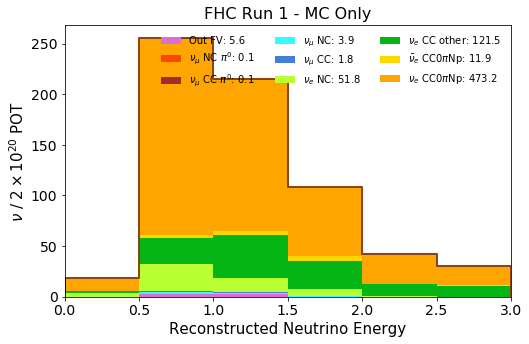

In [40]:
fig = plt.figure(figsize=(8, 5))

n, b, p = plt.hist([datasets_bdt['outfv'][xvar], 
                       datasets_bdt['infv'].query(nue_NC_Npi0)[xvar],
                       datasets_bdt['infv'].query(nue_CC_Npi0)[xvar],
                       datasets_bdt['infv'].query(nue_NC_0pi0)[xvar],
                       datasets_bdt['infv'].query(nue_CC_0pi0)[xvar],
                       datasets_bdt['infv'].query(numu_NC)[xvar],
                       datasets_bdt['infv'].query(numu_CCother)[xvar],
                       datasets_bdt['infv'].query(numubar_1eNp)[xvar], 
                       datasets_bdt['infv'].query(signal)[xvar]],
            bins, histtype='bar', range=[xlow, xhigh], stacked=True, 
            color=[labels['outfv'][1], 
                       labels['nue_NC_Npi0'][1], 
                       labels['nue_CC_Npi0'][1], 
                       labels['nue_NC_0pi0'][1], 
                       labels['nue_CC_0pi0'][1], 
                       labels['numu_NC'][1], 
                       labels['numu_CCother'][1],
                       labels['numubar_1eNp'][1], 
                       labels['signal'][1]], 
            label=[leg['outfv'], 
                   leg['nue_NC_Npi0'], 
                   leg['nue_CC_Npi0'], 
                   leg['nue_NC_0pi0'], 
                   leg['nue_CC_0pi0'], 
                   leg['numu_NC'], 
                   leg['numu_CCother'], 
                   leg['numubar_1eNp'], 
                   leg['signal']
                  ],
            weights=[datasets_bdt['outfv'].totweight_data, 
                     datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data, 
                     datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data,
                     datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(numu_NC).totweight_data,
                     datasets_bdt['infv'].query(numu_CCother).totweight_data,
                     datasets_bdt['infv'].query(numubar_1eNp).totweight_data,
                     datasets_bdt['infv'].query(signal).totweight_data 
                     ])

#This is not how to jump to get one value! You want to sum the columns not the rows!
print(n[-1])
print(sum(n[-1]))
#print(sum(sum(n)))

#print(len(datasets_bdt['infv'].query(signal)[xvar]))
#print(len(datasets_bdt['infv'].query(signal).totweight_data))

#if useWeights == False:
#    nuWro_stat_err_numu = n[-1]


# simulation outline 
tot = list([0, n[-1][0]])+list(n[-1])+[0]
b_step = list([b[0]])+list(b)+list([b[-1]])
plt.step(b_step, tot, color='saddlebrown', linewidth=2)

# plot format stuff
plt.legend(loc='best', prop={"size":10}, ncol=3, frameon=False)


    
plt.xlabel("Reconstructed "+x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
#plt.ylim(0, 30)

if not ISRUN3: 
    plt.title("FHC Run 1 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
else: 
    plt.title("RHC Run 3 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $5\\times10^{20}$ POT', fontsize=15)

##plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_evt_rate_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()
          

/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3245: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/home/alex/miniconda3/envs/vintageXgboostVintageUprootEnv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1449: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


[1947.48199649 2523.15365897 1762.26464033  972.15698366  387.91731342
  455.09529511]
8048.069887977285


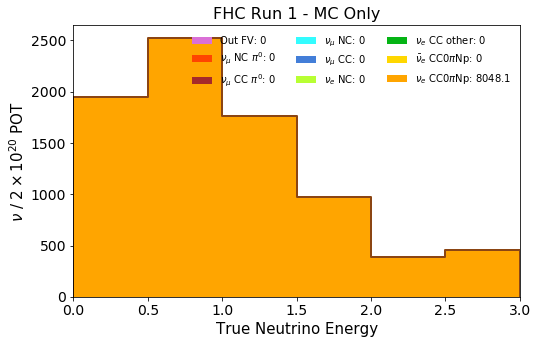

In [40]:
#TRUE BINS

fig = plt.figure(figsize=(8, 5))

n, b, p = plt.hist([datasets_bdt['outfv'][true_var], 
                       datasets_bdt['infv'].query(nue_NC_Npi0)[true_var],
                       datasets_bdt['infv'].query(nue_CC_Npi0)[true_var],
                       datasets_bdt['infv'].query(nue_NC_0pi0)[true_var],
                       datasets_bdt['infv'].query(nue_CC_0pi0)[true_var],
                       datasets_bdt['infv'].query(numu_NC)[true_var],
                       datasets_bdt['infv'].query(numu_CCother)[true_var],
                       datasets_bdt['infv'].query(numubar_1eNp)[true_var], 
                       datasets_bdt['infv'].query(signal)[true_var]],
            bins, histtype='bar', range=[xlow, xhigh], stacked=True, 
            color=[labels['outfv'][1], 
                       labels['nue_NC_Npi0'][1], 
                       labels['nue_CC_Npi0'][1], 
                       labels['nue_NC_0pi0'][1], 
                       labels['nue_CC_0pi0'][1], 
                       labels['numu_NC'][1], 
                       labels['numu_CCother'][1],
                       labels['numubar_1eNp'][1], 
                       labels['signal'][1]], 
            label=[leg['outfv'], 
                   leg['nue_NC_Npi0'], 
                   leg['nue_CC_Npi0'], 
                   leg['nue_NC_0pi0'], 
                   leg['nue_CC_0pi0'], 
                   leg['numu_NC'], 
                   leg['numu_CCother'], 
                   leg['numubar_1eNp'], 
                   leg['signal']
                  ],
            weights=[datasets_bdt['outfv'].totweight_data, 
                     datasets_bdt['infv'].query(nue_NC_Npi0).totweight_data, 
                     datasets_bdt['infv'].query(nue_CC_Npi0).totweight_data,
                     datasets_bdt['infv'].query(nue_NC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(nue_CC_0pi0).totweight_data,
                     datasets_bdt['infv'].query(numu_NC).totweight_data,
                     datasets_bdt['infv'].query(numu_CCother).totweight_data,
                     datasets_bdt['infv'].query(numubar_1eNp).totweight_data,
                     datasets_bdt['infv'].query(signal).totweight_data 
                     ])

print(n[-1])
print(sum(n[-1]))

#inTruth = True

#if useWeights == False and inTruth == True:
#    nuWro_stat_err_numu_inTruth = sum(n)


# simulation outline 
tot = list([0, n[-1][0]])+list(n[-1])+[0]
b_step = list([b[0]])+list(b)+list([b[-1]])
plt.step(b_step, tot, color='saddlebrown', linewidth=2)

# plot format stuff
plt.legend(loc='best', prop={"size":10}, ncol=3, frameon=False)


    
plt.xlabel("True "+x_label, fontsize=15)

#plt.xticks(x_ticks, fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
#plt.ylim(0, 30)

if not ISRUN3: 
    plt.title("FHC Run 1 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
else: 
    plt.title("RHC Run 3 - MC Only", fontsize=16)
    plt.ylabel('$\\nu$ / $5\\times10^{20}$ POT', fontsize=15)

##plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_evt_rate_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [41]:
ending = "Jan19"

#if inTruth == True:
#    print(nuWro_stat_err_numu_inTruth)

#    np.savetxt("numu_nuWro_stat_err_inTruth_"+ending+".csv", 
#               nuWro_stat_err_numu_inTruth,
#               delimiter =", ", 
#               fmt ='% s')

In [42]:
nuwro

True

In [43]:
selected_events = pd.concat([datasets_bdt['outfv'], datasets_bdt['infv']])
#print(selected_events)

tot_signal_weighted = np.nansum(selected_events.query('is_signal==True')['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

tot_signal_weighted = np.nansum(selected_events['totweight_data'])
print('total signal events = '+ str(tot_signal_weighted))

total signal events = 473.15817482100346
total signal events = 669.7602266903923


669.7602266903841


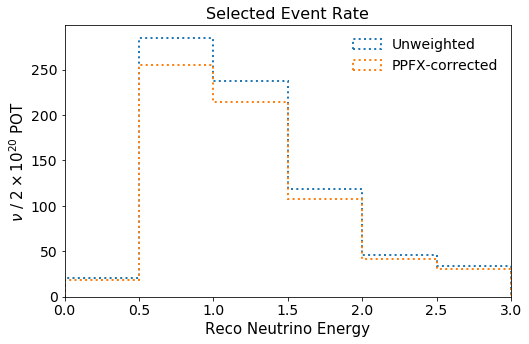

In [44]:


#RECO VAR

# ppfx correction effect 
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.pot_scale, linestyle=":", linewidth=2, histtype='step', 
                  label='Unweighted')

test = plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, histtype='step', 
                  label='PPFX-corrected')

print(sum(test[0]))

# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reco "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
plt.title("Selected Event Rate", fontsize=16)

plt.show()



[1947.48199649 2523.15365897 1762.26464033  972.15698366  387.91731342
  455.09529511]
8048.069887977285


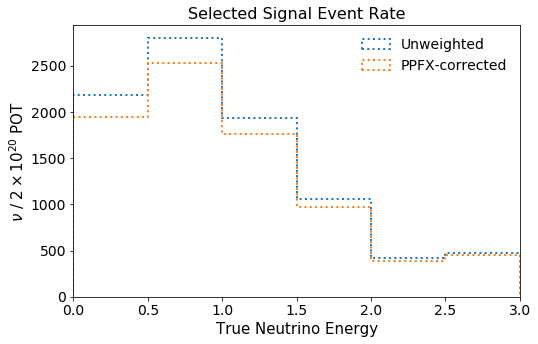

In [45]:
#TRUE VAR


# ppfx correction effect 
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events.query('is_signal==True')[true_var], bins, range=[xlow, xhigh],
            weights=selected_events.query('is_signal==True').pot_scale, linestyle=":", linewidth=2, histtype='step', 
                  label='Unweighted')

true_nuWro = plt.hist(selected_events.query('is_signal==True')[true_var], bins, range=[xlow, xhigh],
            weights=selected_events.query('is_signal==True').totweight_data, linestyle=":", linewidth=2, histtype='step', 
                  label='PPFX-corrected')

print(true_nuWro[0])
print(sum(true_nuWro[0]))


# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("True "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)
plt.title("Selected Signal Event Rate", fontsize=16)

plt.show()


In [46]:
print("True nuWro for comparison: ", true_nuWro[0])

True nuWro for comparison:  [1947.48199649 2523.15365897 1762.26464033  972.15698366  387.91731342
  455.09529511]


In [47]:
ending = "Jan19"

if isTruth == True:
    np.savetxt("numu_nuWro_prior_true_run1_energy_"+ending+".csv", 
               true_nuWro[0],
               delimiter =", ", 
               fmt ='% s')

GENIE bkg subtractions

In [45]:
ending = "Jan19"

In [46]:

numu_bkg_noExt = pd.read_csv("numu_nopions_recoE_usingSelection_run1_cv_numu_bkg_noExt_noDirt_"+ending+".csv", header=None)

print(numu_bkg_noExt.values[:, 0])
##########################

numu_evt_rate = pd.read_csv("numu_nopions_recoE_usingSelection_run1_cv_numu_evt_rate_"+ending+".csv", header=None)

numu_evt_rate = numu_evt_rate.values[:, 0]
print(numu_evt_rate)

#########################

numu_full_evt_rate = pd.read_csv("numu_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_recoCut_"+ending+".csv", header=None)

numu_full_evt_rate = numu_full_evt_rate.values[:, 0]
print(numu_full_evt_rate)

[ 2.32828459 65.67628062 75.89790277 39.00551165 15.28944547  8.62666059]
[  7.73280244 169.63494598 150.07219121  70.75223801  25.47421455
  22.20211329]
[2073.74244887 2628.83713376 1860.12431014 1018.91498672  393.22975949
  434.32193231]


[ 18.53238859 255.52413565 214.80373261 108.05966701  42.10709222
  30.73321061]


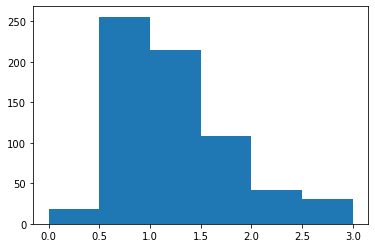

In [47]:


n, b, p = plt.hist(selected_events[xvar], bins, range=[xlow, xhigh],
            weights=selected_events.totweight_data)
#plt.close()

print(n)

In [48]:
len(n)

6

In [49]:
bincenters

array([0.25, 0.75, 1.25, 1.75, 2.25, 2.75])

In [50]:
bins

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ])

In [51]:


binwidth = []

for x in range(len(bincenters)):
    
    if xvar=='tksh_angle': 
        binwidth.append(round(abs((x_ticks)[x+1]-(x_ticks)[x])/2, 2))
        
    else: 
        binwidth.append(round(abs((x_ticks+[xhigh])[x+1]-(x_ticks+[xhigh])[x])/2, 2))
    
binwidth



[0.25, 0.25, 0.25, 0.25, 0.25, 0.25]

In [52]:
## do not include EXT background subtraction! MC only 
#cv_bkgd_mc = [a-b for a,b in zip(fhc_dict['cv_bkgd'], fhc_dict['cv_ext'])]
#I already do not in what has been loaded in

cv_bkgd_mc = numu_bkg_noExt.values[:, 0]

In [53]:
cv_bkgd_mc

array([ 2.32828459, 65.67628062, 75.89790277, 39.00551165, 15.28944547,
        8.62666059])

In [54]:
#ALLSEL NUWRO

# background subtracted event rate - EXT was never added so never subtracted
#(still need to take into acct its uncertainty)
nuwro_evt_rate = [a-b for a,b in zip(n,cv_bkgd_mc)]
print(nuwro_evt_rate)


[16.204104004353415, 189.84785502796836, 138.90582984216837, 69.05415535170312, 26.81764675598139, 22.10655001269091]


In [55]:
len(nuwro_evt_rate)

6

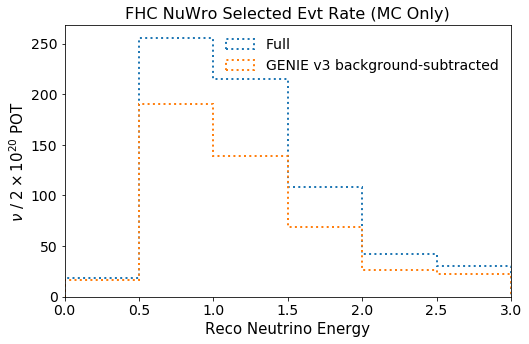

In [56]:
fig = plt.figure(figsize=(8, 5))

plt.hist(selected_events[xvar],
            bins, histtype='step', range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, 
                  label='Full')

plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3 background-subtracted')


# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reco "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)
#plt.ylim(0, 7)

plt.xlim(xlow, xhigh)
plt.title("FHC NuWro Selected Evt Rate (MC Only)", fontsize=16)

plt.show()


(array([ 18.53238859, 255.52413565, 214.80373261, 108.05966701,
         42.10709222,  30.73321061]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. ]),
 <a list of 1 Patch objects>)

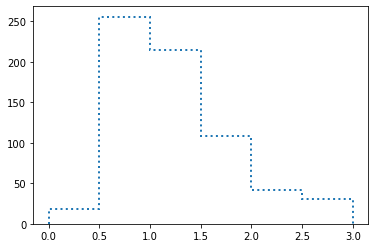

In [57]:
plt.hist(selected_events[xvar],
            bins, histtype='step', range=[xlow, xhigh],
            weights=selected_events.totweight_data, linestyle=":", linewidth=2, 
                  label='Full')

In [58]:
sum(nuwro_evt_rate)

462.9361409948655

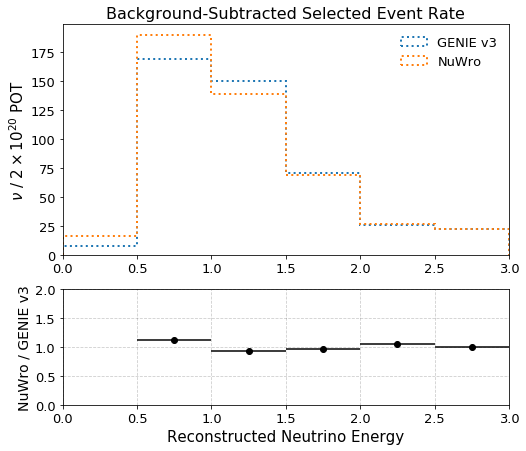

In [59]:
from matplotlib import gridspec

fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

# background subtracted genie evt rate 
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=numu_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='NuWro')

# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(nuwro_evt_rate, numu_evt_rate)], 
             xerr=binwidth, color="black", fmt='o')
ax2.set_ylim(0, 2)


# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("Reconstructed "+x_label, fontsize=15)
ax1.set_title("Background-Subtracted Selected Event Rate", fontsize=16)


plt.show()

In [60]:


# nuwro selected neutrino backgrounds
nuwro_bkgd = pd.concat([datasets_bdt['infv'].query('is_signal==False'), datasets_bdt['outfv']])



In [61]:
nuwro_evt_rate

[16.204104004353415,
 189.84785502796836,
 138.90582984216837,
 69.05415535170312,
 26.81764675598139,
 22.10655001269091]

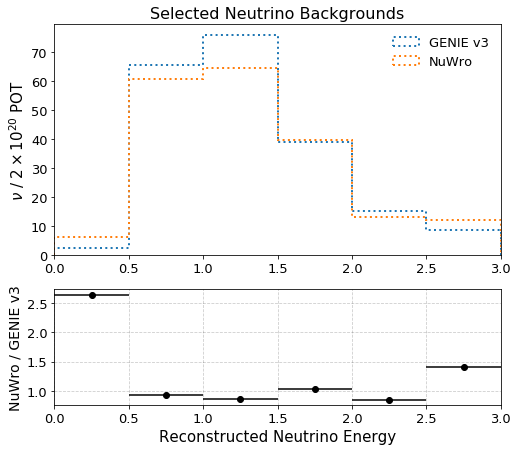

In [62]:
fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

# genie
ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=cv_bkgd_mc, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
h_nuwro_bkgd = ax1.hist(nuwro_bkgd[xvar], bins, histtype='step', 
                        weights=nuwro_bkgd.totweight_data, range=[xlow,xhigh], 
         linestyle=":", linewidth=2, 
                  label='NuWro')[0]

# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(h_nuwro_bkgd, cv_bkgd_mc)], 
             xerr=binwidth, color="black", fmt='o')
#ax2.set_ylim(0, 2)

#ax1.set_ylim(0, 5)


# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("Reconstructed "+x_label, fontsize=15)
ax1.set_title("Selected Neutrino Backgrounds", fontsize=16)


#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_mc_bkgd_compare_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [63]:
#This should be prior true signal from genie
#genie_true = generated_signal(False, true_var, bins, xlow, xhigh)[0]

genie_true = numu_full_evt_rate

print(genie_true)

[2073.74244887 2628.83713376 1860.12431014 1018.91498672  393.22975949
  434.32193231]


[0.25 0.75 1.25 1.75 2.25 2.75]
[156.11698435 240.54109093  61.55002015  12.12741097   1.39572014
   1.13178161]


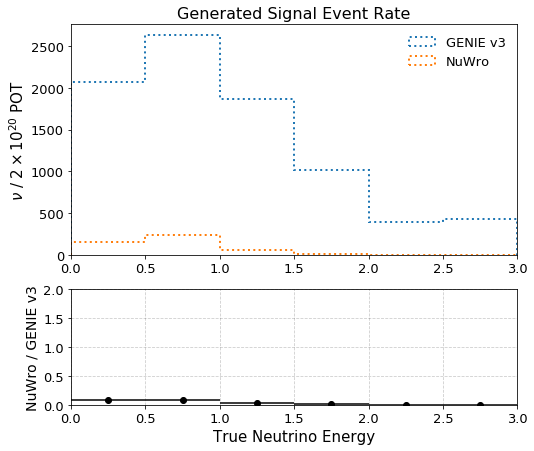

In [64]:
fig = plt.figure(figsize=(8, 7))

gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
    
ax1.tick_params(axis = 'both', which = 'major', labelsize = 13)
ax2.tick_params(axis = 'both', which = 'major', labelsize = 13)

ax2.yaxis.grid(linestyle="--", color='black', alpha=0.2)
ax2.xaxis.grid(linestyle="--", color='black', alpha=0.2)

ax1.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=genie_true, linestyle=":", linewidth=2, 
                  label='GENIE v3')

print(bincenters)

nuwro_true = ax1.hist(generated_events.query('is_signal==True')[true_var], bins, 
                      histtype='step', range=[xlow,xhigh], 
                      weights=generated_events.query('is_signal==True')['totweight_data'], 
                      linestyle=":", linewidth=2, 
                  label='NuWro')[0]


# ratio plot  
ax2.errorbar(bincenters, [a/b for a,b in zip(nuwro_true, genie_true)], 
             xerr=binwidth, color="black", fmt='o')
ax2.set_ylim(0, 2)

print(nuwro_true)

# plot formatting 
ax1.set_xlim(xlow,xhigh)
ax1.set_xticks(x_ticks)
ax1.set_ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)

ax2.set_xlim(xlow,xhigh)
ax2.set_xticks(x_ticks)

ax2.set_xlabel(x_label, fontsize=14)
ax2.set_ylabel("NuWro / GENIE v3", fontsize=14)

ax1.legend(fontsize=13, frameon=False)
    
ax2.set_xlabel("True "+x_label, fontsize=15)
ax1.set_title("Generated Signal Event Rate", fontsize=16)

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_gen_signal_compare_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')
plt.show()

Generated (True - GENIE v3) =  [2073.74244887 2628.83713376 1860.12431014 1018.91498672  393.22975949
  434.32193231]
Selected (Reco - NuWro) =  [16.204104004353415, 189.84785502796836, 138.90582984216837, 69.05415535170312, 26.81764675598139, 22.10655001269091]


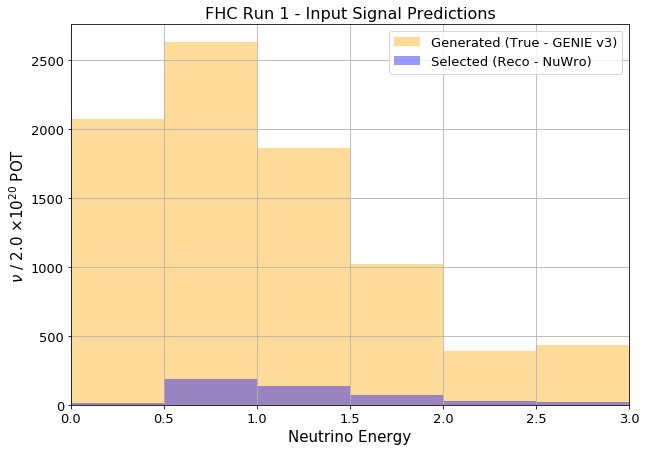

In [65]:
# nuwro input distributions 

fig = plt.figure(figsize=(10, 7))

#So this is Prior True
plt.hist(bincenters, bins, color='orange', label='Generated (True - GENIE v3)', alpha=0.4, 
         weights=genie_true)

print("Generated (True - GENIE v3) = ", genie_true)


#And this is Data Signal
# genie background subtracted evt rate 
plt.hist(bincenters, bins, color='blue', label='Selected (Reco - NuWro)', alpha=0.4, weights=nuwro_evt_rate)

print('Selected (Reco - NuWro) = ', nuwro_evt_rate)

plt.legend(fontsize=13)
plt.title('FHC Run 1 - Input Signal Predictions', fontsize=16)

plt.xlim(xlow, xhigh)

plt.xlabel(x_label, fontsize=15)
    
plt.xticks(x_ticks, fontsize=13)
plt.yticks(fontsize=13)

plt.ylabel("$\\nu$ / 2.0 $\\times 10^{20}$ POT", fontsize=15)

plt.grid()

#plt.savefig("/uboone/data/users/kmiller/uBNuMI_CCNp/plots/fhc/fakedata/nuwro_input_dist_"+xvar+".pdf", 
#            transparent=True, bbox_inches='tight')

plt.show()

In [66]:
nuwro_evt_rate

[16.204104004353415,
 189.84785502796836,
 138.90582984216837,
 69.05415535170312,
 26.81764675598139,
 22.10655001269091]

In [67]:
##ALLSEL NUWRO STAT ERRS

# sumw2 of the full event rate 
nuwro_full_sumw2 = []

for i in range(len(bins)-1):

    if i==len(bins)-2: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' <= '+str(bins[i+1])
    else: 
        bin_query = xvar+' >= '+str(bins[i])+' and '+xvar+' < '+str(bins[i+1])

    #nuwro_full_sumw2.append(sum(datasets_bdt['infv'].query('is_signal==True and '+bin_query).totweight_data ** 2) ) #bug (fixed below)
    nuwro_full_sumw2.append(sum(selected_events.query(bin_query).totweight_data ** 2))
    #nuwro_full_sumw2.append(sum(nue.query(bin_query).totweight_data ** 2))
    
    
print(nuwro_full_sumw2)   
# percent stat error - of the background subtracted event rate 
#print( [(np.sqrt(a)/b) for a,b in zip(nuwro_full_sumw2, nuwro_evt_rate)] )

[4.978968166849229, 68.4721932501244, 58.09970184988147, 29.46632075993373, 11.54717134708982, 8.410280150459]


In [68]:
nuwro_full_sumw2

[4.978968166849229,
 68.4721932501244,
 58.09970184988147,
 29.46632075993373,
 11.54717134708982,
 8.410280150459]

Signal Region Systematic - NuWro

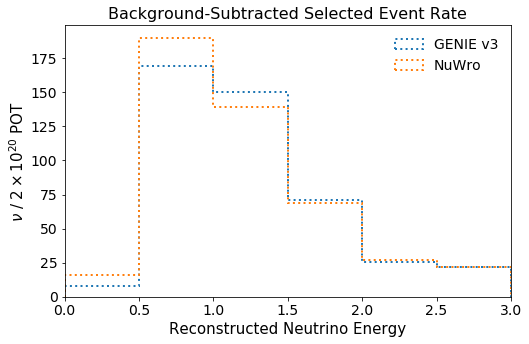

In [69]:
# genie vs nuwro event rate

fig = plt.figure(figsize=(8, 5))

# background subtracted genie evt rate 
plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=numu_evt_rate, linestyle=":", linewidth=2, 
                  label='GENIE v3')

# background subtracted nuwro evt rate
plt.hist(bincenters, bins, histtype='step', range=[xlow,xhigh], 
        weights=nuwro_evt_rate, linestyle=":", linewidth=2, 
                  label='NuWro')

# plot format stuff
plt.legend(loc='best', prop={"size":14}, ncol=1, frameon=False)

plt.ylabel('$\\nu$ / $2\\times10^{20}$ POT', fontsize=15)
    
plt.xlabel("Reconstructed "+x_label, fontsize=15)
plt.xticks(x_ticks, fontsize=14)

plt.yticks(fontsize=14)

plt.xlim(xlow, xhigh)


plt.title("Background-Subtracted Selected Event Rate", fontsize=16)

plt.show()

In [70]:
# genie_evt_rate - background subtracted event rate 
# nuwro_evt_rate - background subtracted event rate 
# genie_nu_bkgd - neutrino background prediction from genie 
# nuwro_nu_bkgd - neutrino background prediction from nuwro

sys_dict = {}



In [71]:
sys_dict['genie_evt_rate'] = numu_evt_rate
sys_dict['nuwro_evt_rate'] = nuwro_evt_rate
sys_dict['genie_nu_bkgd'] = cv_bkgd_mc
sys_dict['nuwro_nu_bkgd'] = list(h_nuwro_bkgd)


In [72]:
np.savetxt("numu_nuWro_MC_Data_Signal_recoCut_run1_energy_"+ending+".csv", 
           nuwro_evt_rate,
           delimiter =", ", 
           fmt ='% s')

In [73]:
nuwro_true

array([156.11698435, 240.54109093,  61.55002015,  12.12741097,
         1.39572014,   1.13178161])

In [74]:
genie_true

array([2073.74244887, 2628.83713376, 1860.12431014, 1018.91498672,
        393.22975949,  434.32193231])

## Create the Numu Cov Uncertainty Matrix

In [75]:
#nuWro_stat_err_numu
#array([ 5.3487608 ,  5.52786268,  6.70549925,  6.97774993,  9.33344634,
#       12.95879938, 16.85555654, 28.36305774, 41.59580091, 77.48407289])

nuWro_stat_err_numu = nuwro_full_sumw2
print(nuWro_stat_err_numu)

[4.978968166849229, 68.4721932501244, 58.09970184988147, 29.46632075993373, 11.54717134708982, 8.410280150459]


In [76]:
numu_bkg_genie_err = pd.read_csv("numu_bkg_exp_err_squared_energy_"+ending+".csv", header=None)

numu_bkg_genie_err = numu_bkg_genie_err.values[:, 0]
print(numu_bkg_genie_err)

[ 1.32160175 25.45926739 18.02796185  4.4277352   1.95172727  0.7519606 ]


In [77]:
totalstat_numu_err = nuWro_stat_err_numu + numu_bkg_genie_err
print(totalstat_numu_err)

[ 6.30056991 93.93146064 76.1276637  33.89405596 13.49889862  9.16224075]


In [78]:
numu_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(numu_cov_stats)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [79]:
numu_cov_stats[np.diag_indices_from(numu_cov_stats)]    = totalstat_numu_err

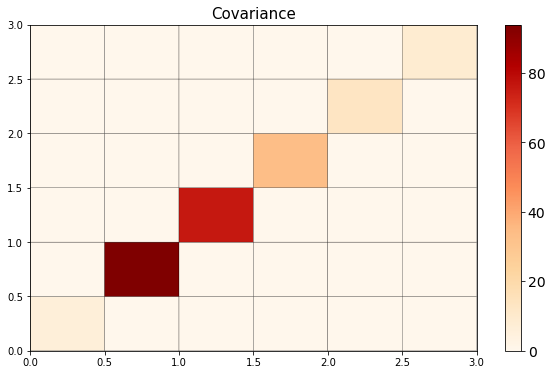

In [80]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

In [81]:
# Now need to load in the genie sys errs from numu

numu_bkg_genie_err = pd.read_csv("numu_cov_genie_only_energy_"+ending+".csv", header=None)

numu_bkg_genie_err = numu_bkg_genie_err.values
print(numu_bkg_genie_err)

[[1.11553043e+00 2.11738776e+01 2.11237464e+01 9.21815636e+00
  4.06983084e+00 2.88105282e+00]
 [2.11738776e+01 8.68511214e+02 9.75833404e+02 6.48527217e+02
  1.86836435e+02 1.86216939e+02]
 [2.11237464e+01 9.75833404e+02 1.14331915e+03 7.74052464e+02
  2.25604080e+02 2.20630576e+02]
 [9.21815636e+00 6.48527217e+02 7.74052464e+02 5.83495547e+02
  1.51608121e+02 1.64137392e+02]
 [4.06983084e+00 1.86836435e+02 2.25604080e+02 1.51608121e+02
  4.69962859e+01 4.30994219e+01]
 [2.88105282e+00 1.86216939e+02 2.20630576e+02 1.64137392e+02
  4.30994219e+01 4.68821329e+01]]


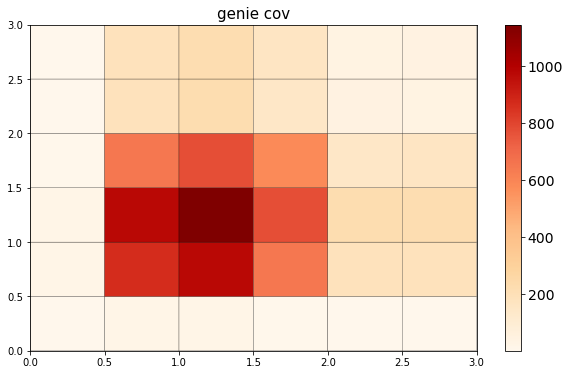

In [82]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, numu_bkg_genie_err, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('genie cov', fontsize=15)

plt.show()

In [83]:
total_cov_nuWro_numu = numu_bkg_genie_err + numu_cov_stats

In [84]:
np.savetxt("data_covmat_numu_MC_nuWro_input_recoE_"+ending+".csv", 
           total_cov_nuWro_numu,
           delimiter =", ", 
           fmt ='% s')

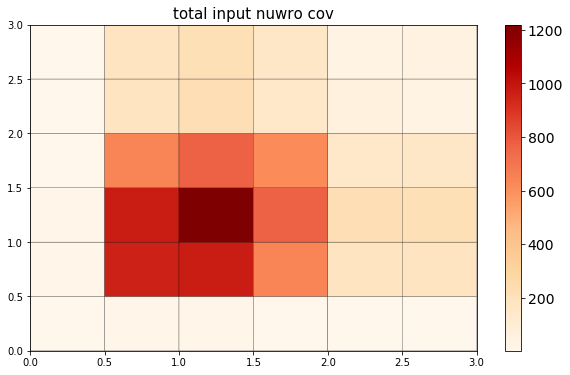

In [85]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cov_nuWro_numu, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro cov', fontsize=15)

plt.show()

In [86]:
total_cor_nuWro_numu = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]
for i in range(len(total_cov_nuWro_numu)): 
        for j in range(len(total_cov_nuWro_numu[i])): 

            if np.sqrt(total_cov_nuWro_numu[i][i])*np.sqrt(total_cov_nuWro_numu[j][j]) != 0: 
                total_cor_nuWro_numu[i][j] = total_cov_nuWro_numu[i][j] / (np.sqrt(total_cov_nuWro_numu[i][i])*np.sqrt(total_cov_nuWro_numu[j][j]))
                
print("")
print(total_cor_nuWro_numu)


[[1.0000000000000002, 0.2506254467364318, 0.2221271856559499, 0.13623121058229945, 0.192144588019036, 0.14131797688131145], [0.2506254467364318, 1.0, 0.9007552728910703, 0.8413198103619058, 0.7743079775013998, 0.8017994195229938], [0.2221271856559499, 0.9007552728910703, 1.0, 0.8920913115471596, 0.830625223054807, 0.8439529930264736], [0.13623121058229945, 0.8413198103619058, 0.8920913115471596, 1.0, 0.7844809568415955, 0.8823926134795763], [0.192144588019036, 0.7743079775013998, 0.830625223054807, 0.7844809568415955, 0.9999999999999999, 0.7401930997271788], [0.14131797688131145, 0.8017994195229938, 0.8439529930264736, 0.8823926134795763, 0.7401930997271788, 1.0]]


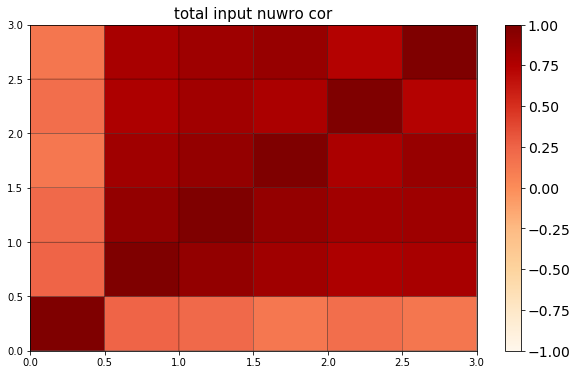

In [87]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_cor_nuWro_numu, cmap='OrRd', edgecolors='k', vmin=-1, vmax=1)#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro cor', fontsize=15)

plt.show()

In [88]:
total_frac_cov_nuWro_numu = [ [0]*(len(bins)-1) for x in range(len(bins)-1) ]

for i in range(len(bins)-1): 

    for j in range(len(bins)-1): 

        c = total_cov_nuWro_numu[i][j]
        
        if nuwro_evt_rate[i]*nuwro_evt_rate[j] != 0:
            total_frac_cov_nuWro_numu[i][j] = c/(nuwro_evt_rate[i]*nuwro_evt_rate[j])

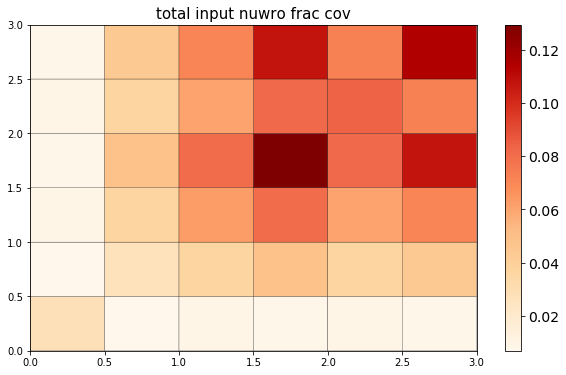

In [89]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, total_frac_cov_nuWro_numu, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('total input nuwro frac cov', fontsize=15)

plt.show()

## Now make the inputs blockwise

In [90]:
nue_data_signal = pd.read_csv("nue_nuWro_MC_Data_Signal_recoCut_run1_energy_"+ending+".csv", header=None)

nue_data_signal = nue_data_signal.values[:, 0]

print(nue_data_signal)

[ 8.52298581 27.57778814  9.94921405  2.91400144  0.9360127   0.44161754]


In [91]:
nue_numu_tot = np.concatenate((nue_data_signal, nuwro_evt_rate), axis=0)

print(nue_numu_tot)
print(len(nue_numu_tot))


[  8.52298581  27.57778814   9.94921405   2.91400144   0.9360127
   0.44161754  16.204104   189.84785503 138.90582984  69.05415535
  26.81764676  22.10655001]
12


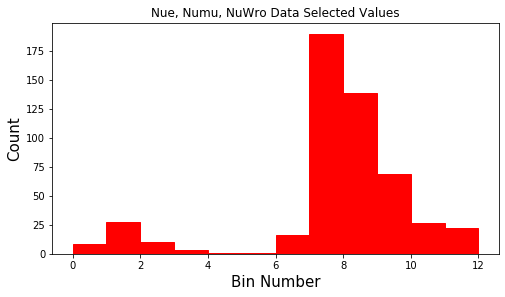

In [92]:
nue_numu_fig = plt.figure(figsize=(8, 7))
nue_numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_numu_ax1 = plt.subplot(nue_numu_gs[0])


bins = np.arange(0, 13, 1)
count = np.arange(0.0, 12.0, 1)


sel_ratio = nue_numu_ax1.hist(count, bins, edgecolor='red', facecolor='red', weights=nue_numu_tot)
nue_numu_ax1.set_ylabel('Count', fontsize=15)
nue_numu_ax1.set_xlabel('Bin Number', fontsize=15)
nue_numu_ax1.set_title("Nue, Numu, NuWro Data Selected Values")
#leg = nue_numu_ax1.legend()
#nue_numu_ax1.set_ylim([0, 1])

nue_numu_fig.savefig("data_signal_MC_nuWro_input_recoE_comb_"+ending+".svg", bbox_inches='tight')

np.savetxt("data_signal_MC_nuWro_input_recoE_comb_"+ending+".csv", 
               nue_numu_tot,
               delimiter =", ", 
               fmt ='% s')

In [93]:
# Load in the blockwise genie cov matrix

blockwise_genie_err = pd.read_csv("blockwise_cov_genie_only_energy_"+ending+".csv", header=None)

blockwise_genie_err = blockwise_genie_err.values
print(blockwise_genie_err)

[[2.96748388e+00 1.05912646e+01 4.71261201e+00 1.55601395e+00
  4.68180866e-01 3.83242802e-01 1.21789395e+00 4.91318370e+01
  5.37748638e+01 3.59374178e+01 9.86461274e+00 1.02282406e+01]
 [1.05912646e+01 4.33264536e+01 1.99075118e+01 6.53681259e+00
  1.92919609e+00 1.57493117e+00 3.19058352e+00 1.85297611e+02
  2.12353965e+02 1.54581352e+02 3.96075713e+01 4.39822804e+01]
 [4.71261201e+00 1.99075118e+01 9.36978988e+00 3.04926064e+00
  8.98802018e-01 7.33820401e-01 1.38183891e+00 8.46958613e+01
  9.89077077e+01 7.25907683e+01 1.87541114e+01 2.06952429e+01]
 [1.55601395e+00 6.53681259e+00 3.04926064e+00 1.02458811e+00
  2.94324795e-01 2.35754353e-01 4.20565280e-01 2.75908496e+01
  3.23689955e+01 2.39286799e+01 6.14817253e+00 6.76104125e+00]
 [4.68180866e-01 1.92919609e+00 8.98802018e-01 2.94324795e-01
  9.06508236e-02 7.16334324e-02 1.52837114e-01 8.48031997e+00
  9.93958109e+00 7.07343871e+00 1.93455487e+00 2.01454484e+00]
 [3.83242802e-01 1.57493117e+00 7.33820401e-01 2.35754353e-01
  7

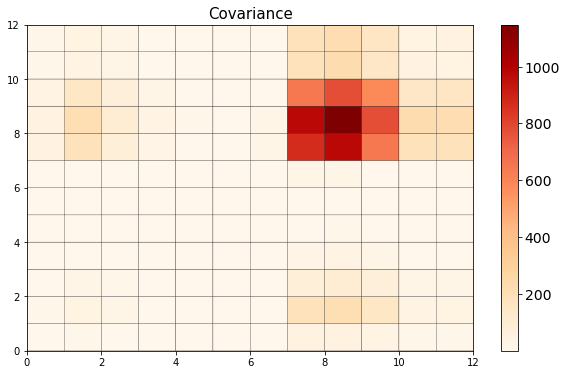

In [94]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
        
plt.pcolor(bins, bins, blockwise_genie_err, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()


Now add in the Stat errs to the blockwise matrix

In [95]:
#nue_cov_mc_stat and numu_cov_mc_stat

totalstat_nue_err = pd.read_csv("totalstat_nuWro_nue_err_energy_"+ending+".csv", header=None)

totalstat_nue_err = totalstat_nue_err.values[:, 0]


nue_stats = totalstat_nue_err
numu_stats = totalstat_numu_err

nue_numu_stats = np.concatenate((nue_stats, numu_stats), axis=0)

print(nue_numu_stats)

[2.23145632e+00 3.43435239e+00 6.18667047e-01 3.70070153e-01
 1.02853891e-01 2.96468474e-02 6.30056991e+00 9.39314606e+01
 7.61276637e+01 3.38940560e+01 1.34988986e+01 9.16224075e+00]


In [96]:
nue_numu_nuWro_cov_stats   = np.zeros([(len(bins)-1), (len(bins)-1)])
print(nue_numu_nuWro_cov_stats)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [97]:
nue_numu_nuWro_cov_stats[np.diag_indices_from(nue_numu_nuWro_cov_stats)]    = nue_numu_stats

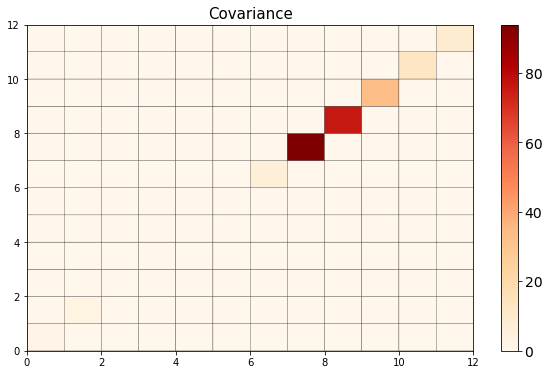

In [98]:
fig = plt.figure(figsize=(10, 6))
        
plt.pcolor(bins, bins, nue_numu_nuWro_cov_stats, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

#plt.savefig("blockwise_nuWro_cov_input.svg", bbox_inches='tight')

plt.show()

nuWro Unisim

In [99]:
nuWro_unisim = pd.read_csv("nuWro_extra_unisim_uncertainties_energy_"+ending+".csv", header=None)

nuWro_unisim = nuWro_unisim.values
print(nuWro_unisim)

[[ 8.94129347e-01 -1.22367487e+00 -1.94976931e+00 -4.75013390e-01
  -2.60521322e-01 -2.91595611e-01  8.01032832e+00  1.91130060e+01
  -1.05587341e+01 -1.60568001e+00  1.27032817e+00 -9.03631140e-02]
 [-1.22367487e+00  1.67467961e+00  2.66838765e+00  6.50087095e-01
   3.56540578e-01  3.99067789e-01 -1.09626616e+01 -2.61574069e+01
   1.44503227e+01  2.19747880e+00 -1.73852773e+00  1.23667870e-01]
 [-1.94976931e+00  2.66838765e+00  4.25173422e+00  1.03583059e+00
   5.68101783e-01  6.35863450e-01 -1.74675983e+01 -4.16784804e+01
   2.30247399e+01  3.50140124e+00 -2.77012144e+00  1.97048924e-01]
 [-4.75013390e-01  6.50087095e-01  1.03583059e+00  2.52354675e-01
   1.38404043e-01  1.54912508e-01 -4.25555120e+00 -1.01539378e+01
   5.60941222e+00  8.53030392e-01 -6.74872034e-01  4.80061294e-02]
 [-2.60521322e-01  3.56540578e-01  5.68101783e-01  1.38404043e-01
   7.59077635e-02  8.49618393e-02 -2.33395909e+00 -5.56893206e+00
   3.07648482e+00  4.67844927e-01 -3.70133890e-01  2.63289847e-02]
 [-2.

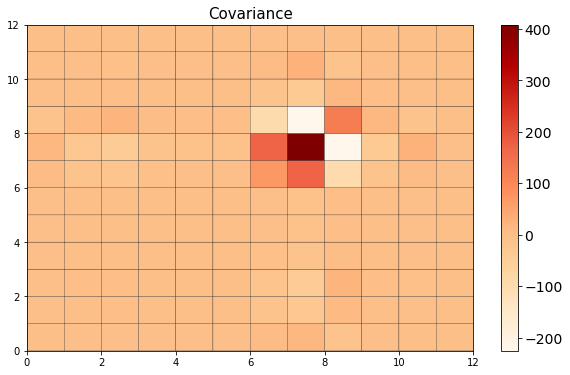

In [100]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
        
plt.pcolor(bins, bins, nuWro_unisim, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)




#plt.xlabel('Reco Shower Energy [GeV]', fontsize=15)
#plt.ylabel('Reco Shower Energy [GeV]', fontsize=15)

plt.title('Covariance', fontsize=15)

plt.show()

Now make the total matrix

In [101]:
total_nuWro_input_cov = nue_numu_nuWro_cov_stats + blockwise_genie_err + nuWro_unisim

In [102]:
np.savetxt("data_covmat_MC_nuWro_input_recoE_comb_"+ending+".csv", 
           total_nuWro_input_cov,
           delimiter =", ", 
           fmt ='% s')

In [103]:
total_nuWro_input_cov = pd.read_csv("data_covmat_MC_nuWro_input_recoE_comb_"+ending+".csv", header=None)

total_nuWro_input_cov = total_nuWro_input_cov.values
print(total_nuWro_input_cov)

[[ 6.09306954e+00  9.36758976e+00  2.76284270e+00  1.08100056e+00
   2.07659545e-01  9.16471915e-02  9.22822227e+00  6.82448430e+01
   4.32161297e+01  3.43317378e+01  1.11349409e+01  1.01378774e+01]
 [ 9.36758976e+00  4.84354856e+01  2.25758994e+01  7.18689969e+00
   2.28573667e+00  1.97399896e+00 -7.77207809e+00  1.59140204e+02
   2.26804288e+02  1.56778831e+02  3.78690436e+01  4.41059483e+01]
 [ 2.76284270e+00  2.25758994e+01  1.42401912e+01  4.08509123e+00
   1.46690380e+00  1.36968385e+00 -1.60857594e+01  4.30173809e+01
   1.21932448e+02  7.60921695e+01  1.59839900e+01  2.08922918e+01]
 [ 1.08100056e+00  7.18689969e+00  4.08509123e+00  1.64701294e+00
   4.32728838e-01  3.90666862e-01 -3.83498592e+00  1.74369118e+01
   3.79784077e+01  2.47817103e+01  5.47330050e+00  6.80904738e+00]
 [ 2.07659545e-01  2.28573667e+00  1.46690380e+00  4.32728838e-01
   2.69412478e-01  1.56595272e-01 -2.18112198e+00  2.91138791e+00
   1.30160659e+01  7.54128364e+00  1.56442098e+00  2.04087382e+00]
 [ 9.

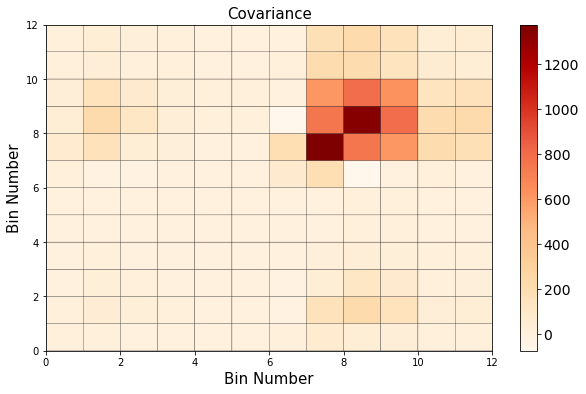

In [104]:
fig = plt.figure(figsize=(10, 6))

bins = np.arange(0, 13, 1)
        
plt.pcolor(bins, bins, total_nuWro_input_cov, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)

plt.xlabel("Bin Number", fontsize=15)
plt.ylabel("Bin Number", fontsize=15)

plt.title('Covariance', fontsize=15)

plt.savefig("blockwise_nuWro_cov_input_energy_"+ending+".svg", bbox_inches='tight')

plt.show()